Here we import all of the modules needed for our model

In [42]:
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import mean_squared_error

Here we import our data and combine it

In [43]:
df = pd.read_csv("student_info.csv")
df2 = pd.read_csv("student_scores.csv.xls")

frames = [df, df2]

data = pd.concat(frames)
data

data.fillna(0, inplace=True)
data["study_hours"] = data["Hours"] + data["study_hours"]
data["student_marks"] = data["Scores"] + data["student_marks"]
data.drop(columns=["Hours", "Scores"], inplace=True)
data.replace(0, np.nan, inplace=True)


data.rename(columns={"study_hours": "Hours", "student_marks": "Marks"}, inplace=True)
data

,Hours,Marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
20,2.70,30.00
21,4.80,54.00
22,3.80,35.00
23,6.90,76.00


In [44]:
from sklearn.preprocessing import MinMaxScaler

mmx = MinMaxScaler()

data = mmx.fit_transform(data)

data = pd.DataFrame(data)

data.rename(columns={0: "Hours", 1: "Marks"}, inplace=True)
data

,Hours,Marks
0,0.707407,0.788462
1,0.674074,0.765897
2,NaN,0.790769
3,0.564198,0.702821
4,0.934568,0.861410
...,...,...
220,0.197531,0.166667
221,0.456790,0.474359
222,0.333333,0.230769
223,0.716049,0.756410


In [45]:
X = data["Hours"].values
y = data["Marks"].values
X

array([0.70740741, 0.67407407,        nan, 0.56419753, 0.9345679 ,
       0.7962963 , 0.68765432, 0.97407407, 0.50493827, 0.69753086,
       0.67777778, 0.92098765, 0.82098765, 0.83950617, 0.87530864,
       0.67283951, 0.64938272, 0.90617284, 0.90246914, 0.81111111,
       0.78024691, 0.87160494, 0.48765432, 0.58641975, 0.53703704,
       0.84691358, 0.66790123, 0.69506173, 0.59753086, 0.78765432,
       0.86790123,        nan, 0.5308642 , 0.94814815, 0.94074074,
       0.74074074, 0.8345679 , 0.75185185, 0.55802469, 0.83703704,
       0.51604938, 0.9654321 , 0.5382716 , 0.88888889, 0.86296296,
       0.62716049, 0.72962963, 0.48271605, 0.54814815, 0.49259259,
       0.49259259, 0.76666667, 0.93950617, 0.54567901, 0.94567901,
       0.93703704, 0.57407407, 0.96666667, 0.52962963, 0.5617284 ,
       0.54197531, 0.76049383, 0.64814815, 0.81728395, 0.96049383,
       0.53703704, 0.8345679 , 0.88395062, 0.49012346, 0.88271605,
       0.52716049, 0.49506173, 0.64814815, 0.77901235, 0.76666

In [46]:
from sklearn.impute import SimpleImputer

missingValues = SimpleImputer(missing_values=np.nan, strategy='mean')

X = missingValues.fit_transform(X.reshape(-1, 1))

X

array([[0.70740741],
       [0.67407407],
       [0.70006173],
       [0.56419753],
       [0.9345679 ],
       [0.7962963 ],
       [0.68765432],
       [0.97407407],
       [0.50493827],
       [0.69753086],
       [0.67777778],
       [0.92098765],
       [0.82098765],
       [0.83950617],
       [0.87530864],
       [0.67283951],
       [0.64938272],
       [0.90617284],
       [0.90246914],
       [0.81111111],
       [0.78024691],
       [0.87160494],
       [0.48765432],
       [0.58641975],
       [0.53703704],
       [0.84691358],
       [0.66790123],
       [0.69506173],
       [0.59753086],
       [0.78765432],
       [0.86790123],
       [0.70006173],
       [0.5308642 ],
       [0.94814815],
       [0.94074074],
       [0.74074074],
       [0.8345679 ],
       [0.75185185],
       [0.55802469],
       [0.83703704],
       [0.51604938],
       [0.9654321 ],
       [0.5382716 ],
       [0.88888889],
       [0.86296296],
       [0.62716049],
       [0.72962963],
       [0.482

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=420)

x_train

array([[0.49259259],
       [0.96666667],
       [0.5308642 ],
       [0.67901235],
       [0.69753086],
       [0.88888889],
       [0.41975309],
       [0.61728395],
       [0.49506173],
       [0.76049383],
       [0.49382716],
       [0.49876543],
       [0.50864198],
       [0.64814815],
       [0.84567901],
       [0.54567901],
       [0.95925926],
       [0.51111111],
       [0.92098765],
       [0.52716049],
       [0.78148148],
       [0.6691358 ],
       [0.62716049],
       [0.94444444],
       [0.59012346],
       [0.83703704],
       [0.48765432],
       [0.95432099],
       [0.70006173],
       [0.86296296],
       [0.84691358],
       [0.88888889],
       [0.79259259],
       [0.27160494],
       [0.57901235],
       [0.7654321 ],
       [0.88271605],
       [0.89382716],
       [0.97407407],
       [0.94938272],
       [0.93950617],
       [0.72962963],
       [0.8345679 ],
       [0.79382716],
       [0.92098765],
       [0.19753086],
       [0.83950617],
       [0.937

In [48]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

acc_check = pd.DataFrame({"Test Values" : y_test, "Predicted Values" : y_pred})

acc_check

,Test Values,Predicted Values
0,0.847179,0.892210
1,0.691795,0.622141
2,0.551282,0.626798
3,0.767051,0.745116
4,0.823718,0.846578
5,0.850897,0.895936
6,0.830000,0.864272
7,0.693590,0.623073
8,0.863462,0.932255
9,0.835641,0.805602


In [40]:
from math import sqrt

mse = mean_squared_error(y_test, y_pred)

rmse = sqrt(mse)

rmse

4.848510069912737

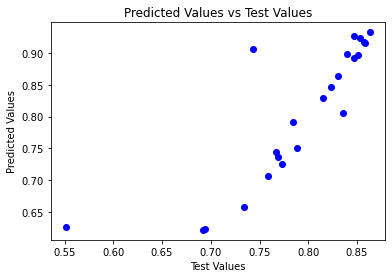

In [49]:
plt.scatter(y_test, y_pred, c="blue", label="Values")
plt.title("Predicted Values vs Test Values")
plt.xlabel("Test Values")
plt.ylabel("Predicted Values")
plt.plot()
plt.show()